In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
X_train = pd.read_csv('0_X_train.csv', index_col='Id')
X_valid = pd.read_csv('1_X_valid.csv', index_col='Id')
X_test  = pd.read_csv('2_X_test.csv', index_col='Id')
y_train = pd.read_csv('0_y_train.csv', index_col='Id')
y_valid = pd.read_csv('1_y_valid.csv', index_col='Id')
y_test  = pd.read_csv('2_y_test.csv', index_col='Id')

num_vars = ['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']

In [3]:
X_train = X_train.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])
X_valid = X_valid.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])
X_test  = X_test.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])

In [4]:
y_train = np.array(y_train)
y_train = y_train.ravel()

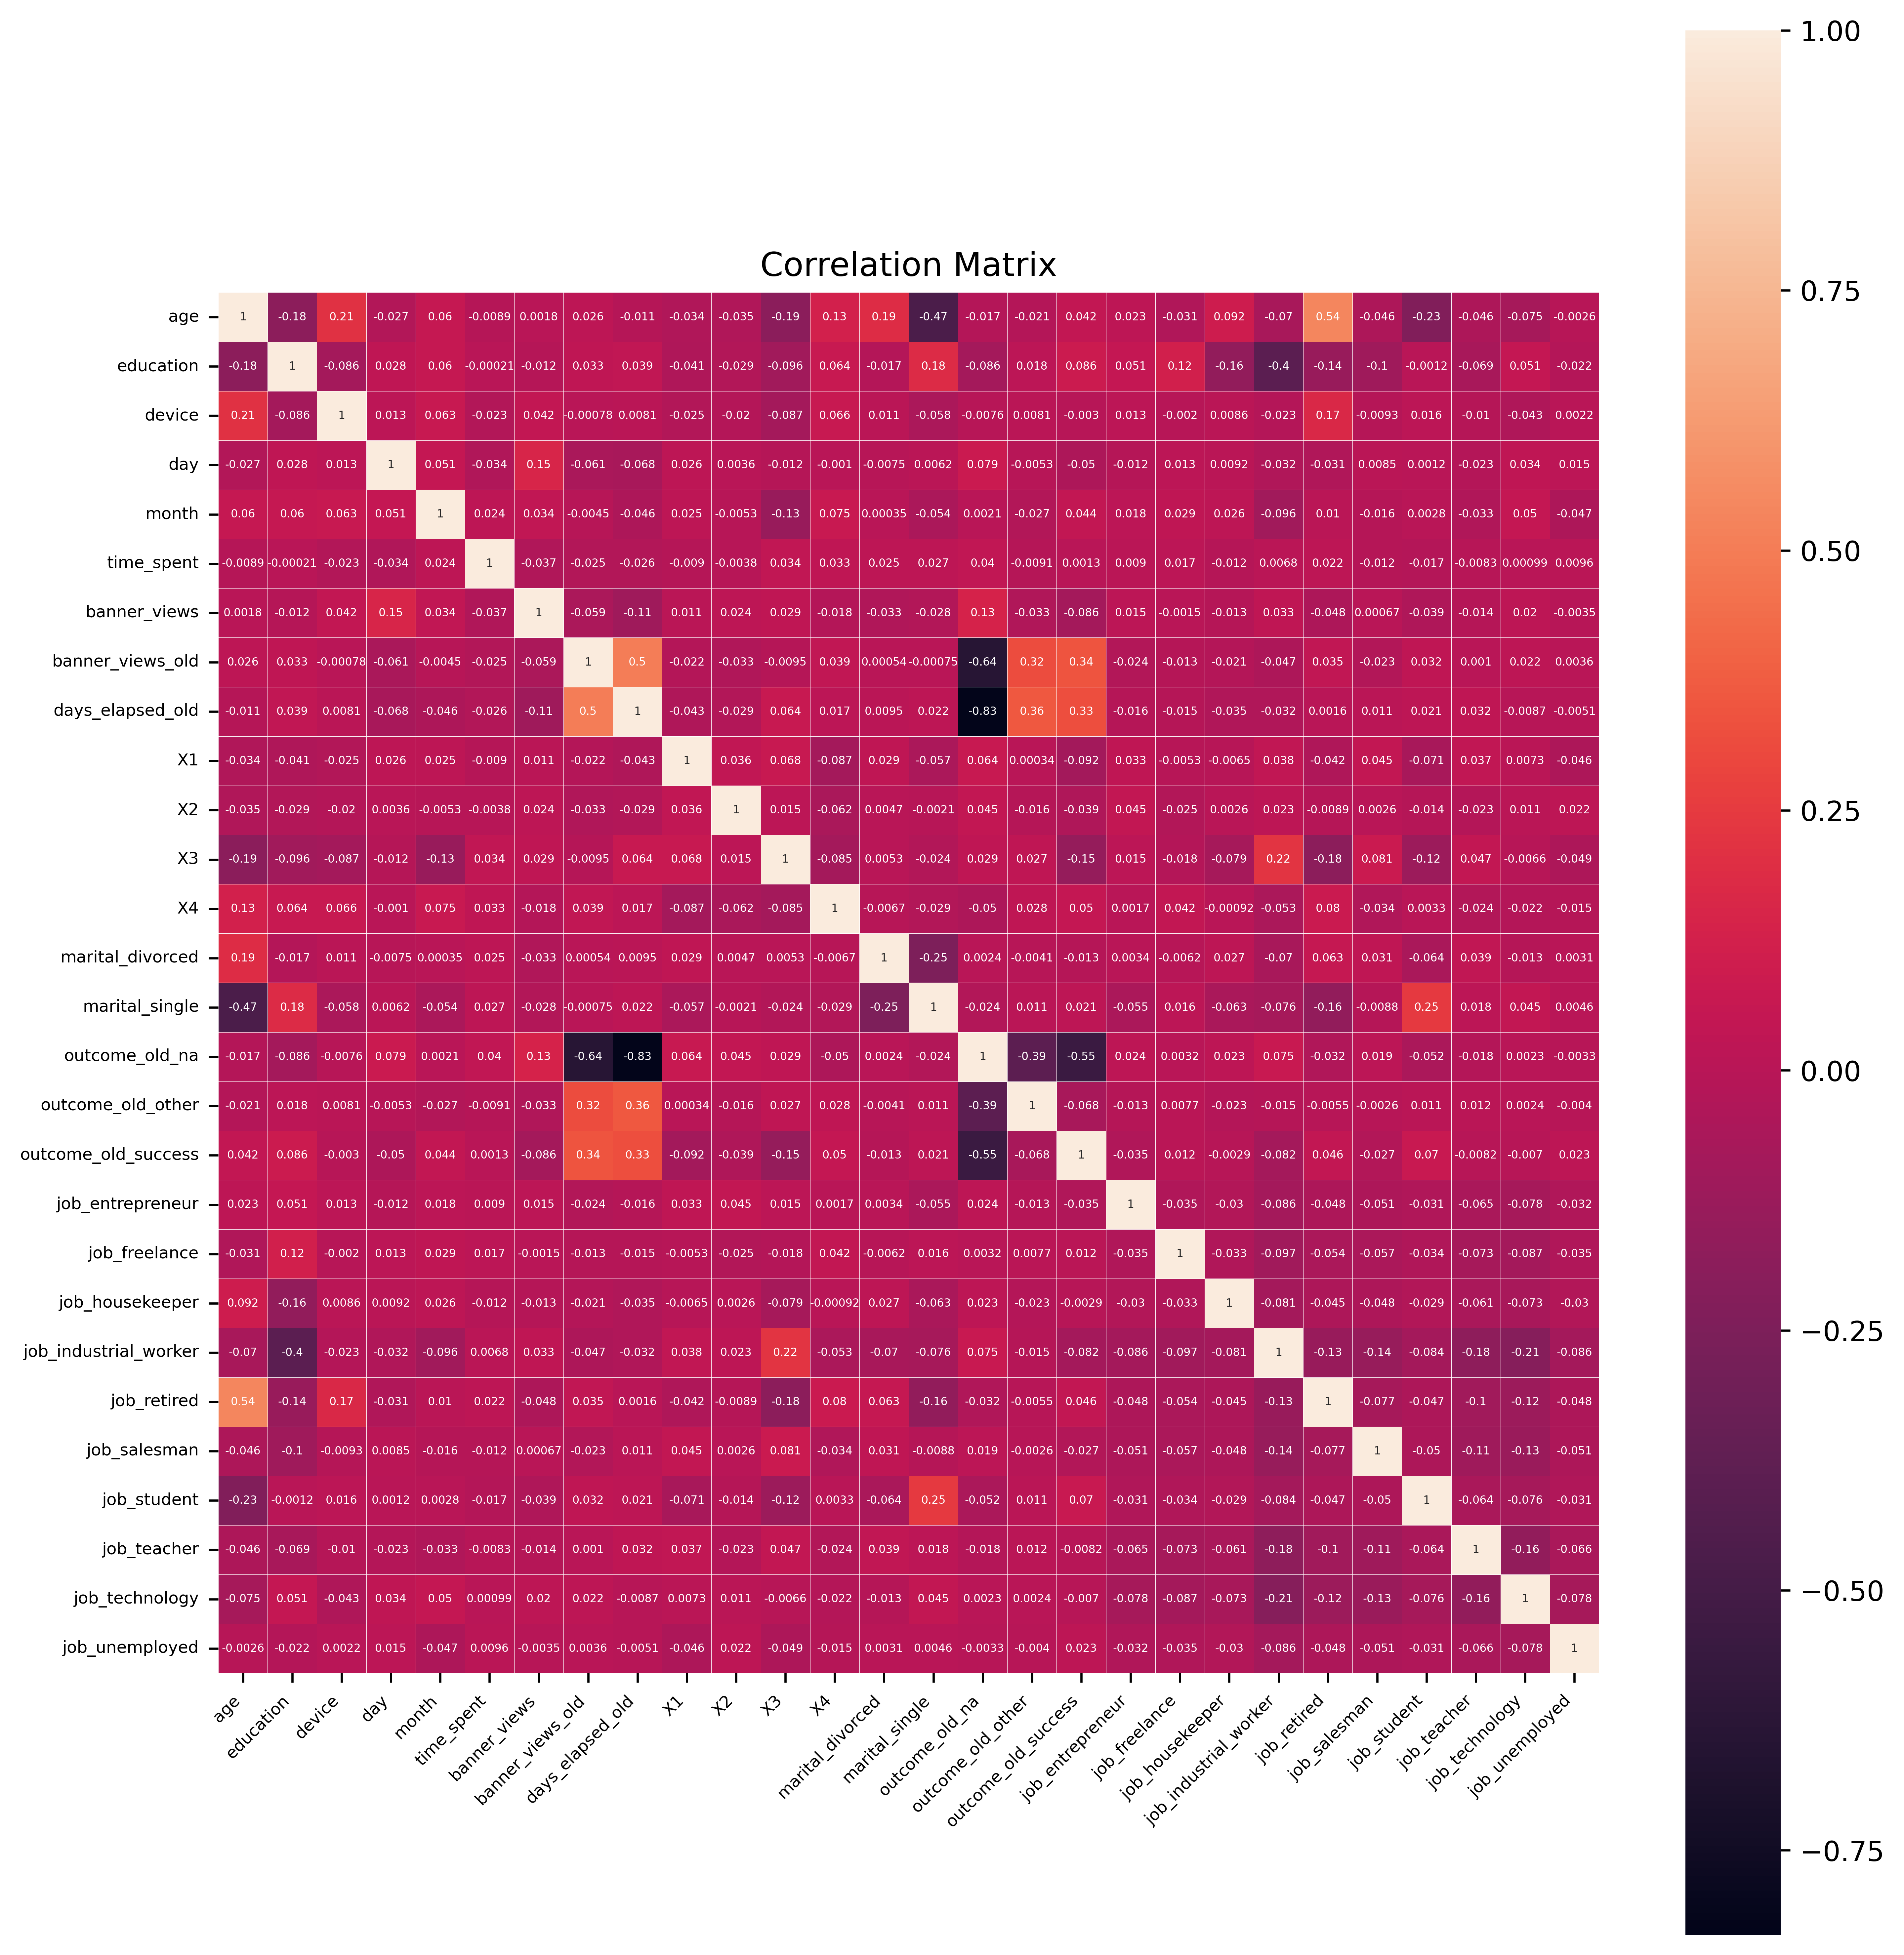

In [5]:
corr_matrix = X_train.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 10), dpi=600)
g = sns.heatmap(corr_matrix, vmin=corr_matrix.values.min(), vmax=1, square=True, 
        linewidths=0.1, annot=True, annot_kws={"size":4})

g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=6, ha='right')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=6)
plt.title('Correlation Matrix')
plt.tight_layout()  # Ensures all elements fit within the figure
plt.show()

In [6]:
# Cannot compute VIF with m dummies because they are perfectly correlated, need to delete one of each variable to have m-1
X_train_VIF = X_train

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_VIF.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_VIF.values, i)
                          for i in range(len(X_train_VIF.columns))]

# Sort the DataFrame by VIF values in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

                  feature        VIF
0                     age  19.199542
15         outcome_old_na  17.161686
12                     X4   8.582278
4                   month   7.019667
1               education   6.217358
3                     day   4.533626
8        days_elapsed_old   3.502494
21  job_industrial_worker   2.541818
11                     X3   2.303797
5              time_spent   2.035429
22            job_retired   1.951620
14         marital_single   1.915659
6            banner_views   1.891081
7        banner_views_old   1.873720
17    outcome_old_success   1.826362
26         job_technology   1.772318
25            job_teacher   1.657524
23           job_salesman   1.471569
16      outcome_old_other   1.406734
20        job_housekeeper   1.252078
13       marital_divorced   1.238950
24            job_student   1.226955
9                      X1   1.204943
27         job_unemployed   1.164358
19          job_freelance   1.162758
18       job_entrepreneur   1.151828
2

In [7]:
X_train = X_train.drop(columns=['age'])
X_valid = X_valid.drop(columns=['age'])
X_test  = X_test.drop(columns=['age'])

In [8]:
X_train_VIF = X_train

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_VIF.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_VIF.values, i)
                          for i in range(len(X_train_VIF.columns))]

# Sort the DataFrame by VIF values in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

                  feature        VIF
14         outcome_old_na  13.910739
11                     X4   7.985972
3                   month   6.753840
0               education   6.048813
2                     day   4.497809
7        days_elapsed_old   3.138403
20  job_industrial_worker   2.465017
10                     X3   2.299794
4              time_spent   2.033981
5            banner_views   1.888077
6        banner_views_old   1.826285
13         marital_single   1.748931
25         job_technology   1.744367
16    outcome_old_success   1.735358
24            job_teacher   1.621296
21            job_retired   1.462790
22           job_salesman   1.453632
15      outcome_old_other   1.394710
12       marital_divorced   1.221353
23            job_student   1.220592
19        job_housekeeper   1.207174
8                      X1   1.204927
18          job_freelance   1.160157
26         job_unemployed   1.150717
17       job_entrepreneur   1.141000
1                  device   1.130021
9

In [9]:
X_train = X_train.drop(columns=['outcome_old_na'])
X_valid = X_valid.drop(columns=['outcome_old_na'])
X_test  = X_test.drop(columns=['outcome_old_na'])

In [10]:
X_train_VIF = X_train

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_VIF.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_VIF.values, i)
                          for i in range(len(X_train_VIF.columns))]

# Sort the DataFrame by VIF values in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

                  feature       VIF
11                     X4  7.333591
3                   month  6.319090
0               education  5.248773
2                     day  4.308570
10                     X3  2.235627
19  job_industrial_worker  2.080801
4              time_spent  2.000529
7        days_elapsed_old  1.883457
5            banner_views  1.854712
13         marital_single  1.736734
6        banner_views_old  1.686724
24         job_technology  1.622785
23            job_teacher  1.487271
15    outcome_old_success  1.447823
20            job_retired  1.365441
21           job_salesman  1.349048
14      outcome_old_other  1.329966
12       marital_divorced  1.213701
8                      X1  1.200323
22            job_student  1.196850
18        job_housekeeper  1.154047
17          job_freelance  1.147353
1                  device  1.129564
16       job_entrepreneur  1.122079
25         job_unemployed  1.110644
9                      X2  1.025349


In [11]:
X_train = X_train.drop(columns=['X4'])
X_valid = X_valid.drop(columns=['X4'])
X_test  = X_test.drop(columns=['X4'])

In [12]:
X_train_VIF = X_train

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_VIF.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_VIF.values, i)
                          for i in range(len(X_train_VIF.columns))]

# Sort the DataFrame by VIF values in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

                  feature       VIF
3                   month  5.849265
0               education  4.557187
2                     day  4.228020
10                     X3  2.229132
4              time_spent  1.979982
18  job_industrial_worker  1.907606
7        days_elapsed_old  1.882796
5            banner_views  1.851307
12         marital_single  1.736004
6        banner_views_old  1.685007
23         job_technology  1.575752
14    outcome_old_success  1.446403
22            job_teacher  1.427460
13      outcome_old_other  1.328918
20           job_salesman  1.310499
19            job_retired  1.279153
11       marital_divorced  1.212421
8                      X1  1.197803
21            job_student  1.183884
16          job_freelance  1.134849
17        job_housekeeper  1.124323
1                  device  1.123974
15       job_entrepreneur  1.112270
24         job_unemployed  1.095804
9                      X2  1.023985


In [13]:
X_train = X_train.drop(columns=['month'])
X_valid = X_valid.drop(columns=['month'])
X_test  = X_test.drop(columns=['month'])

In [14]:
X_train_VIF = X_train

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_VIF.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_VIF.values, i)
                          for i in range(len(X_train_VIF.columns))]

# Sort the DataFrame by VIF values in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

                  feature       VIF
2                     day  4.029326
0               education  3.693586
9                      X3  2.229124
3              time_spent  1.947306
6        days_elapsed_old  1.882595
4            banner_views  1.833896
17  job_industrial_worker  1.738451
11         marital_single  1.735660
5        banner_views_old  1.683821
22         job_technology  1.479610
13    outcome_old_success  1.440914
21            job_teacher  1.359998
12      outcome_old_other  1.328918
19           job_salesman  1.256872
18            job_retired  1.219431
10       marital_divorced  1.210627
7                      X1  1.192492
20            job_student  1.164952
15          job_freelance  1.121895
1                  device  1.113417
14       job_entrepreneur  1.097992
23         job_unemployed  1.087202
16        job_housekeeper  1.078857
8                      X2  1.023821


In [16]:
def plot_dataset(X, y, axes = [-1.5, 2.5, -1, 1.5]):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs") # Plots a point with label 0 are plotted as blue squares ('bs')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^") # Plots a point with label 1 are plotted as green triangles ('g')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize = 20) # Labels the x-axis as x1 with a font size of 20.
    plt.ylabel(r"$x_2$", fontsize = 20, rotation = 0) # Labels the y-axis as x2 with a font size of 20 and a rotation of 0 degrees.
    
# X: 2D numpy array where each row represents an instance of a dataset with two features.
#  y: 1D numpy array of labels for the instances in X. It has two possible classes, represented as 0 and 1.
#   axes: A list of four float values that specifies the limits for the x and y axis of the plot. 
#   By default, it is set to [-1.5, 2.5, -1, 1.5].    
    
def plot_predictions(clf, axes = [-1.5, 2.5, -1, 1.5]):
    x0s = np.linspace(axes[0], axes[1], 100) # Creates a grid of 100x100 points spanning the range specified by axes
    x1s = np.linspace(axes[2], axes[3], 100) # Creates a grid of 100x100 points spanning the range specified by axes
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape) # Predicted class for each point is stored
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2) # Plot the predicted class regions as filled contours with alpha of 0.2 and color map plt.cm.brg
    plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.1) # Plot the decision boundary as filled contours with alpha of 0.1 and color map plt.cm.brg


For support vector machines, we will not run models with any linear decision boundary as this theory-based and cannot be applied to this prediction problem. Therefore, we will focus on the kernels.

The polynomial kernel will correspond to fitting a SV classifier in a
higher dimensional space with all
polynomials of degree d!


In [15]:
from sklearn.svm import SVC

svm_poly_kern = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 1)) # Rransform observations (rows) implicitly
])

# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features. 
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. svm: This step applies the support vector machine algorithm to train a classifier using the polynomial kernel. 
#  The kernel parameter is set to 'poly' to specify that we want to use the polynomial kernel. 
#  The degree parameter sets the degree of the polynomial kernel. In this case, it is set to 3. 
#  The coef0 parameter sets the independent term in the kernel function. In this case, it is set to 1. 
#  The C parameter sets the regularization strength. 
#  A smaller value of C leads to a wider margin but more margin violations, while a larger value of C leads to a narrower margin but fewer margin violations. In this case, it is set to 1.

svm_poly_kern.fit(X_train, y_train) # Fits it to the input dataset X and target vector y

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=1, coef0=1, kernel='poly'))])

In [18]:
# PLOT

On the other hand, we can use a radial/Gauss kernel that then corresponds to fitting a SV classifier in
a infinite dimensional space. 

In [19]:
svm_rbf_kern = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel = 'rbf', gamma = 1, C= 1)) # Transform observations (rows) implicitly
])

# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features. 
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. svm: This step applies the support vector machine algorithm to train a classifier using the RBF kernel. 
#  The kernel parameter is set to 'rbf' to specify that we want to use the RBF kernel. 
#  The gamma parameter sets the width of the Gaussian kernel. In this case, it is set to 1. 
#  The C parameter sets the regularization strength. A smaller value of C leads to a wider margin but more margin violations, while a larger value of C leads to a narrower margin but fewer margin violations. In this case, it is set to 1.

svm_rbf_kern.fit(X_train, y_train) # Fits it to the input dataset X and target vector y

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1, gamma=1))])

In [20]:
# Create folds
from sklearn.model_selection import KFold, GridSearchCV

folds = KFold(n_splits = 10, random_state = 1234, shuffle = True)
# This helps to prevent bias due to any inherent order in the data.

In [21]:
# Kernel trick (implicitly transforming obs (rows), i.e., add new features (columns))
# Polynomial
poly_kern_params = {"svm__degree": np.arange(2, 10), # A range of degrees from 2 to 9 (inclusive)
                    "svm__coef0": [1, 5, 10],
                    "svm__C": [1, 10]} # Searched are 1 and 10

svm_poly_kern = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel = "poly"))
])

# StandardScaler to scale the input data
# Refer to earlier pipeline

svm_poly_kern_cv = GridSearchCV(estimator = svm_poly_kern,
                           param_grid = poly_kern_params,
                           scoring = "accuracy",
                           cv = folds)

# estimator: Specifies the algorithm or model to be tuned
#  param_grid: A dictionary that contains the hyperparameters to be tuned and the possible values for each hyperparameter
#   scoring: parameter is set to "accuracy", which means that the performance of the model will be evaluated based on its accuracy score.
#    cv: The dataset is split into 'folds' equal parts, and the model is trained and evaluated 10 times, each time using a different fold as the test set for cross-validation

svm_poly_kern_cv.fit(X_train, y_train) # Fits it to the input dataset X and target vector y

In [ ]:
# RBF
rbf_kern_params = {"svm__gamma": [0.1, 1, 5, 10, 100], # Range of gamma values being searched 
                   "svm__C": [1, 10]} # Searched are 1 and 10

svm_rbf_kern = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel = "rbf"))
])

# StandardScaler to scale the input data
# Refer to earlier pipeline

svm_rbf_kern_cv = GridSearchCV(estimator = svm_rbf_kern,
                           param_grid = rbf_kern_params,
                           scoring = "accuracy",
                           cv = folds)

# estimator: Specifies the algorithm or model to be tuned
#  param_grid: A dictionary that contains the hyperparameters to be tuned and the possible values for each hyperparameter
#   scoring: parameter is set to "accuracy", which means that the performance of the model will be evaluated based on its accuracy score.
#    cv: The dataset is split into 'folds' equal parts, and the model is trained and evaluated 10 times, each time using a different fold as the test set for cross-validation

svm_rbf_kern_cv.fit(X_train, y_train) # Fits it to the input dataset X and target vector y

In [ ]:
#  prints the best hyperparameters found by the GridSearchCV algorithm

#pd.DataFrame(svm_rbf_kern_cv.cv_results_)
print("Best parameters")
print("Polynomial kernel:", svm_poly_kern_cv.best_params_)
print("RBF kernel:", svm_rbf_kern_cv.best_params_)

In [ ]:
# Calculates the accuracy score of the best estimator found by the grid search (svm_poly_cv.best_estimator_) on the test set (X_test, y_test). 
#  The accuracy_score function is used to calculate the accuracy of the predictions made by the model on the test set.

print("Test Accuracies")
print("Polynomial kernel --- Accuracy on valid:", round(accuracy_score(y_valid, svm_poly_kern_cv.best_estimator_.predict(X_valid),3)))
print("RBF kernel --- Accuracy on valid:", round(accuracy_score(y_valid, svm_rbf_kern_cv.best_estimator_.predict(X_valid),3)))
print("Polynomial kernel --- Accuracy on test:", round(accuracy_score(y_test, svm_poly_kern_cv.best_estimator_.predict(X_test),3)))
print("RBF kernel --- Accuracy on test:", round(accuracy_score(y_test, svm_rbf_kern_cv.best_estimator_.predict(X_test),3)))


We wanted to explore Support Machine Vectors  becuase they are considered as a very powerful and flexible tool for classification.